In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [118]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import shapely
from shapely.wkb import dumps, loads
from shapely.geometry import LineString
import collections

In [272]:
ls

Azamgarh_UP/                    graphs.txt
Resized_Azamgarh/               linestring.py
SpaceNet_Roads_Sample.tar.gz    mask_to_graph_script.py
Untitled.ipynb                  resizing_azamgarh_images.ipynb
apls/


In [278]:
FILE = Path('graphs.txt')  #PATH TO GRAPHS Generated from mask_to_graph_script.py
                           #Those are actually not graphs, they are just line strings - point coordinates.
f = FILE.open().read().split('\n') #Just stores every individual line in f

In [279]:
def get_linestring(s):
    #Takes a line from 'f' and returns (image_id, line_string_coordinates)
    img_id = s.split(',')[0]
    coords = s[s.find('(')+1 : -2]
    coords = coords.split(', ')
    coords = [tuple(float(o) for o in i.split(' ')) for i in coords]
    return img_id, coords

In [119]:
mydict = collections.defaultdict(list)

#Mapping each image ID to all the linestrings attached to the imaeg_id in graphs.txt

for i in f[1:-1]:
    if "EMPTY" in i:
        continue
    img_id, linestring = get_linestring(i)
    mydict[img_id].append(LineString(linestring))

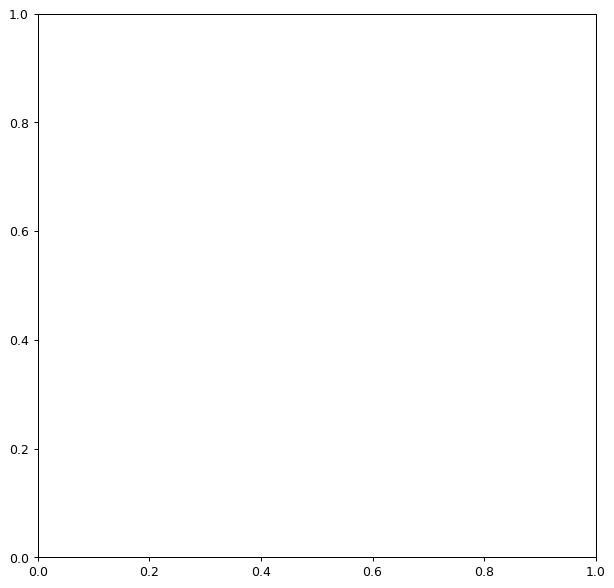

In [277]:
#Stuff to help in plotting linestrings

COLOR = {
    True:  '#6699cc',
    False: '#ffcc33'
    }

def v_color(ob):
    return COLOR[ob.is_simple]

def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', color='#999999', zorder=1)

def plot_bounds(ax, ob):
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, 'o', color='#000000', zorder=1)

def plot_line(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, color=v_color(ob), alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

fig = plt.figure(1, figsize=(8,8), dpi=90)

# 1: simple line
ax = fig.add_subplot(111)

In [280]:
#Helper functions to plot linestrings

def plot_all(ax, line):
    plot_coords(ax, line)
    plot_bounds(ax, line)
    plot_line(ax, line)
    ax.set_title('a) simple')
def plot_mask(img_id):
    """
    Usage : plot_mask(img_index)
    img_index as in mydict
    """
    ax.clear()
    img_id = str(img_id) + '.jpg'
    for i in mydict[img_id]:
        plot_all(ax, i)

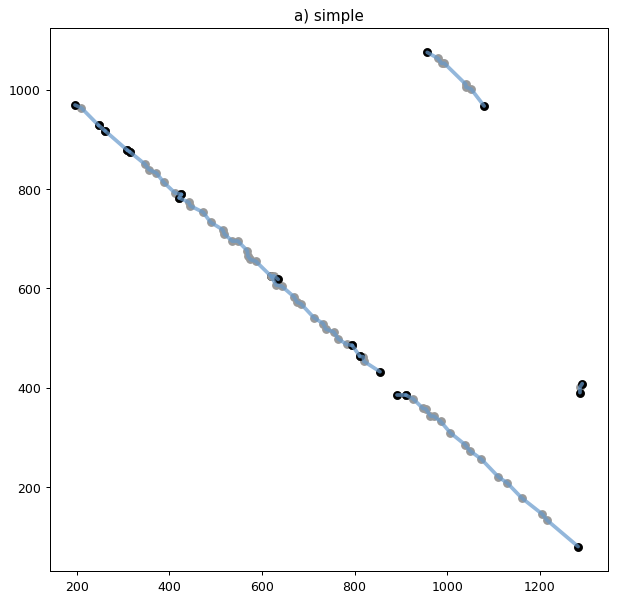

In [281]:
plot_mask(146)
fig